# Lambda operator

Coming from the paradigm of [functional programing](https://en.wikipedia.org/wiki/Functional_programming) Python makes use of the __lambda operator__. It allows us to define __anonymous functions__ which are functions without a name and which we usually define and assign a name to. This is e.g. useful when we don't want to explicitly define said function because it is only used exactly in this one place.<br> 
<br>
Lambda operators follows this syntax --> __lambda arg_list : expression__.<br>
_arg_list_ can be any number of arguments which are evaluated in the _expression_ and the result is then returned.
<br>
<br>
Anonymous functions are especially applicable in combination with the __map__ and __reduce__ functions.
<br>
<br>
Example:

In [1]:
f = lambda a,b : a-b# a,b is the argument list
print (f(7,1))

6


Both __map()__ and __reduce()__ return iterators, which we will be dealing with now.

# The map function

The map function has the following syntax --> _map(function,sequence)_ <br>
_function_ is applied to a _sequence_ of elements. It returns a _map_ object, which can be converted into a list.
<br>
<br>
Example:

In [2]:
s1 = ['this', 'is', 'an', 'impression', 'list']
s2 = ['a', 'bb', 'ccc', 'dddd', 'eeeee']
m1 = map(lambda x: len(x), s1)
m2 = map(lambda x,y: len(y), s1,s2)

print(list(m1))
print(list(m2))

[4, 2, 2, 10, 4]
[1, 2, 3, 4, 5]


In the second example we see that we can pass multiple lists to the lambda operator, however, we also need to have multiple parameters here. Therefore the second example does not make much sense. It improves if we change it a bit:

In [3]:
m3 = map(lambda x,y: len(x+y), s1,s2)

print(list(m3))

[5, 4, 5, 14, 9]


Overall this makes more sense when doing arithmetics - we define multiple lists with numbers and do some different calculus in each lambda operator:

In [4]:
l1 = [1,2,3,4,5]
l2 = [-1,-2,-3,-4,-5]
l3 = [0.1]*5

print(list(map(lambda x,y : x+y , l1,l2)))
print(list(map(lambda x,y : x*y , l1,l2)))
print(list(map(lambda x,y,z : x-y+z , l1,l2,l3)))

[0, 0, 0, 0, 0]
[-1, -4, -9, -16, -25]
[2.1, 4.1, 6.1, 8.1, 10.1]


# The filter function

The filter function requires a function which evaluates a truth condition as first argument. This is then applied to a list which should be given as second argument and overall a list is returned, where the evaluation results in _True_. <br>
<br>
Example (sentence string is from Wikipedia):

In [14]:
sentence = 'Denali (/dɪˈnɑːli/)[5][6] (also known as Mount McKinley, its former official name)[7] is the highest mountain peak in North America, with a summit elevation of 20,310 feet (6,190 m) above sea level'
words = sentence.split()

In [6]:
capitals = filter(lambda x: x[0].isupper(), words)
list(capitals)

['Denali', 'Mount', 'McKinley,', 'North', 'America,']

Again, we need to convert to a list since the filter function returns a filter object.

# Iterators in Python

For a concise overview about iterators, please refer to the [Python doc](https://docs.python.org/3/tutorial/classes.html#iterators). We want to focus on the application part of this, moreover define the difference between __iterator__ and __iterable__. <br>
An __iterable__ is an object that has an __iter( )__ method which returns an iterator, or which defines a __getitem( )__ method that can take sequential indexes starting from zero (and raises an IndexError when the indexes are no longer valid). So an iterable is an object that you can get an iterator from.

An iterator is an object with a __next( )__  method. 

Whenever you use a for loop, or map, or a list comprehension, etc. in Python, the __next( )__  method is called automatically to get each item from the iterator, thus going through the process of iteration.<br>
Another way of looking at this:<br>

__Iterables__ are

- anything that can be looped over (e.g. strings, lists, files etc.)
- anything that can appear on the right-side of a for-loop: _for x in iterable:_ (also applies to other loops)
- anything you can call with _iter()_ that will return an ITERATOR: iter(obj)
- an object that defines __iter__ that returns a fresh ITERATOR, or it may have a __getitem__ method suitable for indexed lookup.


In [7]:
l = [1,2,3]
i = iter(l)
print(next(i))

1


__Iterators__ are objects:

- with states; states remember the position during iteration,
- with a __next__ method that:
        returns the next value in the iteration
        updates the state to point at the next value
        signals when it is done by raising StopIteration
- and that is self-iterable (meaning that it has an __iter__ method that returns self).


In [8]:
demoString = 'iterate over this'
i = iter(demoString)
print(i.__next__())
print(i.__next__())
print(i.__next__())
print(i.__next__())
print(i.__next__())
print(i.__next__())
print(i.__next__())

i
t
e
r
a
t
e


One very important usage of iterators is implicit within for-loops. 

# Generators in Python

A generator is a function that returns some kind of data _before_ (!) it is finished. However, it pauses at that point, making it possible to resume from there. It makes use of the keyword __yield__.<br>
Example:

In [9]:
def myGen():
    yield 1
    yield 2
    yield 3

In [10]:
g = myGen()
print(next(g))


#do something else
s = 'this is a string'
print(s)

#pick up where you left off
print(next(g))
print(next(g))

1
this is a string
2
3


Opposed to _functions_ , _generators_ deal with data one piece at a time. This makes them suitable to deal with large amounts of data. Using the keyword __yield__, one element at a time is returned, whereas functions typically handle all code until they reach the end or a return statement. Since _generators_ are _iterable_, just like lists, we can loop over them:

In [11]:
g1 = myGen()

for i in g1:
    print(i)

1
2
3


### Working with iterators and generators

Building an own iterator class comes with a lot of overhead. <br>
You have to:
- implement a class with a __next()__ and and __iter()__ method
- track the internal states and
- raise a stopiteration when all of the values have been processed

Generators take care of this work - they are functions generating iterators which we then can loop over.
All you need to do is define a function containing the __yield__ statement.<br>
Now it comes in especially handy when we use __generetor expressions__ to generate the data _on the fly_  - just as in lambda functions, generator expressions create generators _anonymously_:

In [12]:
gE = (x**2 for x in [2,3,4]) # this creates a generator object

Now this looks very much like the syntax in using list comprehensions, except that we use _parentheses_ instead of square brackets. 

<div class="alert alert-block alert-success">
<b>Important:</b> The main difference to <b>list comprehensions</b>  is the fact that generator excpressions produce one item at a time, while <b> list comprehensions </b> produce the whole list at once. Regarding the syntax, we use <i>parentheses</i> for <b>generator expressions</b> and square brackets for <b>list comprehensions</b>.
</div>

In [13]:
print(next(gE))
print(next(gE))
print(next(gE))

4
9
16


<div class="alert alert-block alert-warning">
<b>Info:</b> If you use a generator expression inside a function, you may omit the parentheses
</div>
Example:

In [14]:
print(x for x in [1,2,3])
print(sum(x for x in [1,2,3]))

<generator object <genexpr> at 0x10d4d4650>
6


### Advantages of generator usage


Compare the implementation of an iterator vs. a generator:

In [15]:
#version iterator
class multByTwoIterator:
    
    def __init__(self, max = 0):
        self.max = max
        
    def __iter__(self):
        self.n = 0
        return self
    
    def __next__(self):
        if self.n > self.max:
            raise StopIteration
        result = 2 * self.n
        self.n += 1
        return result

In [16]:
#version generator
def multByTwoGenerator(max = 0):
        n = 0
        while n <= max:
            yield 2 * n
            n += 1

In [17]:
for i in multByTwoIterator(5):
    print(i)

0
2
4
6
8
10


In [18]:
for g in multByTwoGenerator(5):
    print(g)

0
2
4
6
8
10


<div class="alert alert-block alert-success">
Both are repsonsible for producing the same result. However, defining the iterator class along with all the methods is <u>cumbersome</u> and <u>prone to errors</u>! The generator is <u>much shorter</u> but, maybe more importantly, can <u>deal with large amounts of data</u> more easily, as it produces items only when asked for!
</div>

In [19]:
def cubes():
    n = 1
    while True:
        yield n**2
        n += 1

In [20]:
c = cubes()
print(next(c))
print(next(c))
print(next(c))

1
4
9


In [21]:
def nums():
    nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    for num in nums:
        yield num
print (sum(nums()))
for num in nums():
    print (num)

55
1
2
3
4
5
6
7
8
9
10


### Applications of generators in pipelines

Let's use the example from chapter [The filter function](#The-filter-function). Imagine, we want to process all the words (or elements split by a space) in the given sentence. We want to do these things:

- read in every word
- check if its length is odd
- if so, triple its length
- print it out as a string

If we want to do this without generators, it might look like this:

In [15]:
result_words = sentence.split()
len(result_words)

31

In [16]:
def myReadCalcFunction(word):
    l = len(word)
    if (l % 2) == 1:
        l = l*3
        print('Length: ' + str(l))
        return l
for w in result_words:
    myReadCalcFunction(w)

Length: 15
Length: 15
Length: 15
Length: 27
Length: 9
Length: 9
Length: 21
Length: 15
Length: 3
Length: 27
Length: 15
Length: 9
Length: 15


Now with generators, we may achieve something like this:

In [17]:
wordlengths = [len(w) for w in result_words] 

print(wordlengths)
#print(len([x for x in wordlengths if x % 2 == 1]))

def odd_length(mywords):
    for wL in mywords:
        if wL % 2 == 1:
            yield wL

def mult3(nums_l):
    for l in nums_l:
        yield l * 3

def makeString(nums_l):
    for num in nums_l:
        yield ('Result is: %s' % num)

pipeline = makeString(mult3(odd_length(wordlengths)))
for num in pipeline:
    print (num)

[6, 18, 5, 5, 2, 5, 9, 3, 6, 8, 8, 2, 3, 7, 8, 4, 2, 5, 8, 4, 1, 6, 9, 2, 6, 4, 6, 2, 5, 3, 5]
Result is: 15
Result is: 15
Result is: 15
Result is: 27
Result is: 9
Result is: 9
Result is: 21
Result is: 15
Result is: 3
Result is: 27
Result is: 15
Result is: 9
Result is: 15


# List comprehensions

List comprehensions are a powerful tool to rewrite code in a short way. As a rule of thumb, anything that can be written in a loop, can also be rewritten with the help of a list comprehension. Let's start with a simple example:

In [25]:
empty_list = []

for i in range (0,7):
    empty_list.append(i**2)
print(empty_list)

[0, 1, 4, 9, 16, 25, 36]


In [26]:
## same effect with list comprehensions 
empty_list_2 = [x**2 for x in range(0,7)]
print(empty_list_2)

[0, 1, 4, 9, 16, 25, 36]


The basic syntax explained: __x**2__ holds the effect of what should happen __for x__ regarding the chosen elements, in this case the elements __in range(0,7)__.<br>
Let's look at another example with strings:

In [27]:
s = 'this is the string we want to work with'
l = s.split(' ')
print (l)

['this', 'is', 'the', 'string', 'we', 'want', 'to', 'work', 'with']


In [28]:
new_list = []
for elem in l:
    new_elem = elem.upper()
    new_list.append(new_elem)
print(new_list)

['THIS', 'IS', 'THE', 'STRING', 'WE', 'WANT', 'TO', 'WORK', 'WITH']


In [29]:
##with list comprehension
another_list = [s.upper() for s in l]
print(another_list)

['THIS', 'IS', 'THE', 'STRING', 'WE', 'WANT', 'TO', 'WORK', 'WITH']


List comprehensions can be modified with if statements:

In [30]:
another_list = [s.upper() for s in l if s[0] == 'w']
print(another_list)

['WE', 'WANT', 'WORK', 'WITH']


What we achieved was a selection of elements, i.e. we chose to include and capitalize words only if the original word starts with a __*w*__.

In [31]:
a = [['A', 'B', 'C'], ['AA', 'BB', 'CC'], ['AAA', 'BBB', 'CCC'],]

res = []
for e1 in a:
    for e2 in e1:
        res.append(e2)
print (res)

['A', 'B', 'C', 'AA', 'BB', 'CC', 'AAA', 'BBB', 'CCC']


In [32]:
res_2 = [x for e1 in a for x in e1]
res_2

['A', 'B', 'C', 'AA', 'BB', 'CC', 'AAA', 'BBB', 'CCC']

Now this is difficult to read. If you transfer nested loops into nested list comprehensions, remember to keep the order intact. This means, the first comprehension is the outer loop, the second comprehension is the inner loop.

### Comprehensions on lists in lists

Applying a function to each sublist in a list, can also be done with a comprehension - imagine you want to square each element in a list but keep the internal structure of the container as a whole:

In [33]:
x = [[1,2,3],[4,5,6],[7,8,9]]
res = [[n**2 for n in y] for y in x]# [n+1 for n in y]  <-- this part keeps the structure of lists intact
#for y in x <-- we have to iterate over every list in x
print(res)

[[1, 4, 9], [16, 25, 36], [49, 64, 81]]


This can also be achieved by a _map_:

In [34]:
def show_result(map_object):
    for item in map_object:
        print(item, end=' ')
    print('')  # for new line

In [35]:
map_result = [map(lambda x:x**2 ,y) for y in x]
list(map_result[0])

[1, 4, 9]

## List comprehensions for sets and dictionaries

In [36]:
strlist = 'data science is a nice field of research dealing with lots of data samples'.split(' ')
newset = {s[0] for s in strlist} # if you want to create sets, use the curly brackets
print(newset)

{'o', 'l', 'a', 'n', 'r', 'd', 'f', 's', 'w', 'i'}


In [37]:
strlist_2 = 'a new list including words of different length'.split(' ')
newdict = {s[0]:len(s) for s in strlist_2} # dictionaries are created as expected, using key:values and the {}
print(newdict)

{'a': 1, 'n': 3, 'l': 6, 'i': 9, 'w': 5, 'o': 2, 'd': 9}


## Advanced list comprehensions

Understanding list comprehensions can be tricky sometimes, consider this example:

In [38]:
res = [x for i in range(2) for x in range(10) if i == x%2]

In [39]:
print(res) # we have to print the output, to get an idea of this nested comprehension

[0, 2, 4, 6, 8, 1, 3, 5, 7, 9]


Try to understand how the output is created, we have, in fact, two loops here.<br>
Any list comprehension can be rewritten into loops, let's try this:

In [40]:
res = []
for x in range(2):
    for y in range(10):
        if y % 2 == x:
            res.append(y)
print(res) # this is much more readable!

[0, 2, 4, 6, 8, 1, 3, 5, 7, 9]


As you can see, this leads to the same output as the list comprehension above. <br>
Hint: Look at the similarity between the nested loops and the syntax in the list comprehension: The chronology of the outer and the inner loop must be maintained, followed be the if-statement.

### Practice - working with a dataset

The dataset is taken from [here](https://www.kaggle.com/mbogernetto/fires-in-the-brazilian-amazon-1999-to-2019-inpe#inpe_amazon_fires_1999_2019.csv).

### Context

The Amazon rainforest is a moist broadleaf tropical rainforest in the Amazon biome that covers territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana.

The lush region provides important benefits to communities living near and far. Nearly 500 indigenous communities call the Amazon rainforest home. It’s a highly biodiverse ecosystem, home to untold species of plants and animals. The rainforest can create its own weather and influence climates around the world. Unfortunately, the fragile ecosystem faces the constant threat of deforestation and fires (for natural or anthropogenic causes).


### Content

This data set refers to fire outbreaks in the Amazon rainforest in Brazilian territory. The data used are public and were downloaded from the INPE website, where each line is a "fire spot". The data were aggregated using SQL so that you could work with lighter files.

In [3]:
with open('inpe_amazon_fires_1999_2019.csv') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().replace('"', '') for x in content]#this cleans up the carriage return character at the end of each line

### Task 1: <br>
Using a list comprehension, create a new list called __new_content__ containing lists of six elements, where each list corresponds to one line in the *content* list. The six elements in each list each are the elements separated by the colons.

In [4]:
content[:5]

['year,month,state,latitude,longitude,firespots',
 '1999,1,AMAZONAS,-2.3711133333333333,-59.8999333333333333,3',
 '1999,1,MARANHAO,-2.2573947222222222,-45.4878305555555556,36',
 '1999,1,MATO GROSSO,-12.6113368421052632,-55.0765157894736842,19',
 '1999,1,PARA,-2.4748204597701149,-48.5469666666666667,87']

In [5]:
new_content = [x.split(',') for x in content if 'year' not in x]

In [6]:
new_content[0:3]

[['1999', '1', 'AMAZONAS', '-2.3711133333333333', '-59.8999333333333333', '3'],
 ['1999',
  '1',
  'MARANHAO',
  '-2.2573947222222222',
  '-45.4878305555555556',
  '36'],
 ['1999',
  '1',
  'MATO GROSSO',
  '-12.6113368421052632',
  '-55.0765157894736842',
  '19']]

Answer the following questions:
- How many fires were there each year? Display this with the help of the following cells.
- What is the region with the most fires?

Present various solutions, make use of the lambda operator, if possible

In [7]:
#solution for: 'how many fires were there each year?'
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

fire = {}

for e in new_content:
    
    if e[0] in fire.keys():
        fire[e[0]] += 1
    else:
        fire[e[0]] = 1
          
counts = Counter(fire)
common = counts.most_common()
common.sort(key=lambda tup: tup[0])

labels = [item[0] for item in common]
number = [item[1] for item in common]


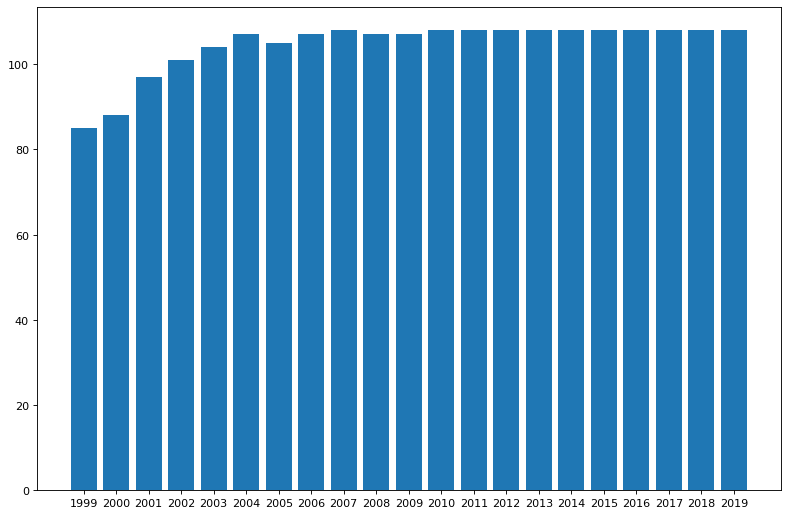

In [8]:
nbars = len(common)

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

In [9]:
#solution for: 'region with most fires'
import operator
firespots = {}

for element in new_content:
    key = element[2]
    val = element[5]
    if key in firespots.keys():
        firespots[key] += int(val)
    else:
        firespots[key] = int(val)   
        
region = max(firespots.items(), key=operator.itemgetter(1))[0]
number = max(firespots.items(), key=operator.itemgetter(1))[1]

print('The region with the most fires: {}'.format(region))
print('The number of fires in {} was {}'.format(region, number))

The region with the most fires: PARA
The number of fires in PARA was 4930320


In [10]:
print(firespots)


{'AMAZONAS': 1054722, 'MARANHAO': 937007, 'MATO GROSSO': 3269179, 'PARA': 4930320, 'RONDONIA': 1588397, 'RORAIMA': 481125, 'AMAPA': 193272, 'TOCANTINS': 87214, 'ACRE': 420017}


In [11]:
print(max(firespots, key=lambda k: firespots[k]))
print(max(firespots, key=lambda k: k))

PARA
TOCANTINS


In [149]:
firespots

{'AMAZONAS': 1054722,
 'MARANHAO': 937007,
 'MATO GROSSO': 3269179,
 'PARA': 4930320,
 'RONDONIA': 1588397,
 'RORAIMA': 481125,
 'AMAPA': 193272,
 'TOCANTINS': 87214,
 'ACRE': 420017}